In [1]:
from numpy.random import randint
import numpy as np # for importing numpy
import pandas as pd # for importing pandas
import seaborn as sns # seaborn is used to plot
from matplotlib.animation import ArtistAnimation
import random
import os
from scipy import stats
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load the data from a csv file.
data = pd.read_csv('data/wildlife.csv')

In [3]:
data.head()

,INCIDENT_DATE,STATE,AIRPORT_ID,AIRPORT,OPID,OPERATOR,ATYPE,TYPE_ENG,SPECIES_ID,SPECIES,...,REPORTED_NAME,REPORTED_TITLE,REPORTED_DATE,SOURCE,PERSON,NR_INJURIES,NR_FATALITIES,LUPDATE,TRANSFER,INDICATED_DAMAGE
0,12/31/2013 0:00,CA,KHWD,HAYWARD EXECUTIVE ARPT,UNK,UNKNOWN,UNKNOWN,NaN,YI005,Barn swallow,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Carcass Found,NaN,NaN,4/24/2014 0:00,False,False
1,12/31/2013 0:00,CA,KSMF,SACRAMENTO INTL,PCM,WESTAIR,C-208,C,J2104,Northern pintail,...,Deleted,Deleted,NaN,Multiple,Airport Operations,NaN,NaN,4/24/2014 0:00,False,True
2,12/31/2013 0:00,CA,KSNA,JOHN WAYNE-ORANGE COUNTY ARPT,BUS,BUSINESS,C-650,D,H4105,Double-crested cormorant,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Pilot,NaN,NaN,4/24/2014 0:00,False,True
3,12/30/2013 0:00,CA,KSMF,SACRAMENTO INTL,UNK,UNKNOWN,UNKNOWN,NaN,1A1,Virginia opossum,...,Deleted,Deleted,NaN,FAA Form 5200-7-E,Carcass Found,NaN,NaN,4/24/2014 0:00,False,False
4,12/30/2013 0:00,CA,KMER,CASTLE ARPT,BUS,BUSINESS,PA-44 SEMINOLE,A,K33,Hawks,...,Deleted,Deleted,NaN,Multiple,Tower,NaN,NaN,4/24/2014 0:00,False,True


In [4]:
data.describe()

,COST_REPAIRS,AMO,EMA,AC_MASS,NUM_ENGS,ENG_1_POS,ENG_2_POS,ENG_4_POS,INCIDENT_MONTH,INCIDENT_YEAR,...,ENROUTE,HEIGHT,SPEED,DISTANCE,AOS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES
count,36.000000,1284.000000,1279.000000,1307.000000,1302.000000,1293.000000,1193.000000,18.000000,1823.000000,1823.000000,...,0.0,1147.000000,722.000000,1361.000000,90.000000,49.000000,36.000000,49.000000,0.0,0.0
mean,58475.138889,26.998442,17.020328,3.541699,1.973118,2.377417,2.115675,2.000000,6.876029,2012.487109,...,NaN,901.883173,144.448753,1.258339,88.777778,10964.061224,60537.111111,11374.408163,NaN,NaN
std,131350.509659,20.711054,9.563865,0.941829,0.394095,2.068453,1.760405,1.455214,3.220746,0.499971,...,NaN,1965.058814,46.320697,4.472511,358.052026,34291.980650,135562.661873,35436.891612,NaN,NaN
min,100.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2012.000000,...,NaN,0.000000,0.000000,0.000000,0.000000,50.000000,103.000000,53.000000,NaN,NaN
25%,1500.000000,10.000000,10.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2012.000000,...,NaN,0.000000,120.000000,0.000000,1.000000,200.000000,1570.750000,211.000000,NaN,NaN
50%,12500.000000,24.000000,10.000000,4.000000,2.000000,1.000000,1.000000,1.000000,7.000000,2012.000000,...,NaN,50.000000,140.000000,0.000000,5.500000,400.000000,12971.000000,411.000000,NaN,NaN
75%,40625.000000,42.000000,23.000000,4.000000,2.000000,5.000000,4.000000,4.000000,10.000000,2013.000000,...,NaN,800.000000,163.000000,0.000000,24.000000,1000.000000,42824.250000,1054.000000,NaN,NaN
max,680000.000000,97.000000,46.000000,5.000000,4.000000,7.000000,6.000000,4.000000,12.000000,2013.000000,...,NaN,15000.000000,290.000000,40.000000,3000.000000,200000.000000,698163.000000,205342.000000,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 93 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INCIDENT_DATE          1823 non-null   object 
 1   STATE                  1823 non-null   object 
 2   AIRPORT_ID             1823 non-null   object 
 3   AIRPORT                1823 non-null   object 
 4   OPID                   1823 non-null   object 
 5   OPERATOR               1823 non-null   object 
 6   ATYPE                  1823 non-null   object 
 7   TYPE_ENG               1301 non-null   object 
 8   SPECIES_ID             1823 non-null   object 
 9   SPECIES                1817 non-null   object 
 10  DAMAGE                 1296 non-null   object 
 11  COST_REPAIRS           36 non-null     float64
 12  AMA                    1323 non-null   object 
 13  AMO                    1284 non-null   float64
 14  EMA                    1279 non-null   float64
 15  EMO 

In [6]:
data = data[['INCIDENT_DATE']]

In [7]:
data.head()

,INCIDENT_DATE
0,12/31/2013 0:00
1,12/31/2013 0:00
2,12/31/2013 0:00
3,12/30/2013 0:00
4,12/30/2013 0:00


In [8]:
data['INCIDENT_DATE'] = pd.to_datetime(data['INCIDENT_DATE'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823 entries, 0 to 1822
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   INCIDENT_DATE  1823 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 14.4 KB


In [10]:
data = data.groupby('INCIDENT_DATE')['INCIDENT_DATE'].agg(['count'])

In [11]:
data.head()

,count
INCIDENT_DATE,
2012-01-02,1
2012-01-04,2
2012-01-05,5
2012-01-06,3
2012-01-07,2


In [12]:
# rename the count column to incidents
data.rename(columns={'count': 'incidents'}, inplace=True)

In [13]:
data.head()

,incidents
INCIDENT_DATE,
2012-01-02,1
2012-01-04,2
2012-01-05,5
2012-01-06,3
2012-01-07,2


In [14]:
# filter the data that has an index between 2012 and 2013
data = data.loc['2012-01-01':'2013-01-01']

In [15]:
data.head()

,incidents
INCIDENT_DATE,
2012-01-02,1
2012-01-04,2
2012-01-05,5
2012-01-06,3
2012-01-07,2


In [16]:
data = data.fillna(0)

In [17]:
data.head()

,incidents
INCIDENT_DATE,
2012-01-02,1
2012-01-04,2
2012-01-05,5
2012-01-06,3
2012-01-07,2


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2012-01-02 to 2013-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   incidents  338 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB


In [19]:
data['incidents'] = data['incidents'].astype('int')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2012-01-02 to 2013-01-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   incidents  338 non-null    int64
dtypes: int64(1)
memory usage: 5.3 KB


In [21]:
data.head()
# the data dataframe has as index the date and as column the number of incidents
# but it doesn't has the dates where there are no incidents
# so we need to create a new dataframe with all the dates between 2012 and 2013
# and then merge it with the data dataframe

tmp_data = pd.DataFrame({'date':pd.date_range(start='2012-01-01', end='2013-01-01')})
tmp_data = tmp_data.set_index('date')

In [22]:
# merge the data with the tmp_data
data = tmp_data.merge(data, how='left', left_index=True, right_index=True)

In [23]:
data.head()

,incidents
date,
2012-01-01,NaN
2012-01-02,1.0
2012-01-03,NaN
2012-01-04,2.0
2012-01-05,5.0


In [24]:
data_2012 = data.loc['2012-01-01':'2012-12-31']
data_2013 = data.loc['2013-01-01':'2013-12-31']

In [25]:
len(data_2012)

366

In [26]:
data_2012.head()

,incidents
date,
2012-01-01,NaN
2012-01-02,1.0
2012-01-03,NaN
2012-01-04,2.0
2012-01-05,5.0


In [27]:
mu = data_2012['incidents'].mean()
sigma = data_2012['incidents'].std()

In [28]:
mu, sigma

(2.7744807121661723, 1.568723827446849)

In [29]:
# we also take the average of strike incidents in 2013
xbar = data_2013['incidents'].mean()

In [30]:
# what is our sample size?
n = data_2013['incidents'].count()

In [31]:

n

1

In [32]:
# calculate the error
SE = sigma / math.sqrt(n)
SE

1.568723827446849

In [33]:
# calculate the zscore for the mean of 2013 (xbar)
zscore = (xbar - mu) / SE
zscore

-1.1311619554183732

In [34]:
# calculate the critical value of the alpha level on side of the 
# distribution, because we're only interested in a mean decline
alpha = 0.05
critical_value = stats.norm.ppf(1 - alpha)
critical_value*=-1

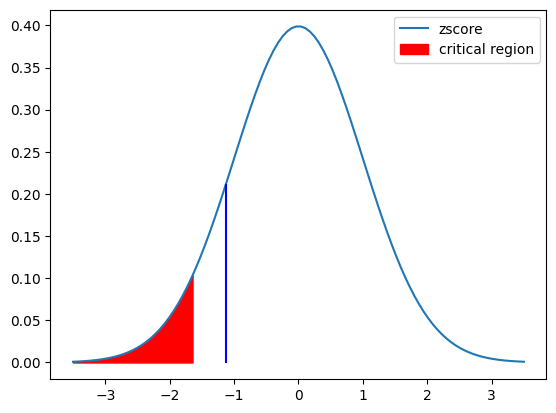

In [35]:
# plot the normal distribution
samples = 100
x_plot = np.linspace(-3.5,3.5, samples)
y_plot = stats.norm.pdf(x_plot, 0, 1)
plt.plot(x_plot, y_plot)
# plot the critical region
x_crit = np.linspace(-3.5, critical_value, samples)
y_crit = stats.norm.pdf(x_crit, 0,1)
plt.fill_between(x_crit,y_crit, color = 'red')
plt.plot([zscore,zscore], [0, stats.norm.pdf(zscore, 0, 1)], color = 'blue')
plt.legend(['zscore','critical region'])
plt.show()

In [36]:
# so given the values, lets test the alternative hypothesis
zscore < critical_value

False

In [37]:
# =============
# ==== housing prices=====
# =============

In [38]:
# data = np.random.random_sample(25) * 360000 + 100000 / floor it
housing_prices = pd.Series(
    [319711.,  289066.,  212512.,  195347.,  245589.,  418577.,
     301112.,  327251.,  434408.,  224529.,  450276.,  423406.,
     230321.,  275374.,  215945.,  209971.,  322661.,  292517.,
     378317.,  194028.,  347261.,  104542.,  231457.,  335174., 
     369656.])
housing_prices.head()

0    319711.0
1    289066.0
2    212512.0
3    195347.0
4    245589.0
dtype: float64

In [39]:
mu_usa = 289.100

In [40]:
# to perform a t test more quickly, we can use scipy.stats ttest_1samp
# for a one sample t test. The function returns the t statistic and the p-value in one single call. Slightly different results but close t_statistic, p = stats.ttest_1samp(housing_prices, mu)

In [41]:
t_statistic, p = stats.ttest_1samp(housing_prices, mu_usa)

In [42]:
t_statistic, p

(16.62005836669496, 1.1405457908951438e-14)

In [43]:
# to test our alternative hypothesis, we need to calculate the critical value
alpha = 0.05
p < alpha/2

True

In [44]:
mean = housing_prices.mean()

In [45]:
mean

293960.32

In [46]:




# ==========================
# ========== two sample t-test ======
# ==========================
# two different data samples
# ex: hight heels and flats
# null -> both are the same
# alternative -> they are different

sample_a = np.array([4.9, 6.2, 1.0, -4.8, 2.2, 5.4])
sample_b = np.array([2.8, 6.9, 8.4])

In [47]:
sample_a.var()

13.914722222222222

In [48]:
sample_b.var()

5.602222222222223

In [49]:
# check the variance for equal variance
stats.ttest_ind(a = sample_a, b = sample_b)

# pvalue < 0.05 reject null hypothesis

# I cannot reject the null hypothesis

Ttest_indResult(statistic=-1.3263334711127697, pvalue=0.22636455334070857)

=============
==== ANOVA =====
=============

In [50]:
# The four sample sets with guitar string sustain lengths
guitar1 = np.array([8021., 6947., 8411., 7593., 7781.])
guitar2 = np.array([7013., 6222., 7202., 6437., 5946., 6917., 6152.])
guitar3 = np.array([9896., 9497., 8986., 8496.])
guitar4 = np.array([8253., 8467., 7898., 7699., 8738., 8638.])

In [51]:
# One-way ANOVA the convenient way
f_value, p_value = stats.f_oneway(guitar1, guitar2, guitar3, guitar4)
print(f_value)
print(p_value)

# Null hypothesis test at alpha level .05
p_value > .05

26.652942076110193
7.687999312604955e-07


False

In [52]:
# Construct single dataset for Tukey-kramer HSD test
x1 = pd.DataFrame(guitar1, columns=['observation'])
x1['grouplabel'] = 'olixer'
x2 = pd.DataFrame(guitar2, columns=['observation'])
x2['grouplabel'] = 'ernies'
x3 = pd.DataFrame(guitar3, columns=['observation'])
x3['grouplabel'] = 'fendor'
x4 = pd.DataFrame(guitar4, columns=['observation'])
x4['grouplabel'] = 'daddar'

data = x1.append(x2).append(x3).append(x4)
data.head()

result = sm.stats.multicomp.pairwise_tukeyhsd(data.observation, data.grouplabel)
print(result.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
daddar ernies -1726.5952    0.0 -2518.7154 -934.4751   True
daddar fendor   936.5833 0.0449    17.5349 1855.6318   True
daddar olixer  -531.5667 0.3319 -1393.7105  330.5772  False
ernies fendor  2663.1786    0.0  1770.7749 3555.5822   True
ernies olixer  1195.0286 0.0038   361.3462  2028.711   True
fendor olixer   -1468.15  0.002 -2423.2532 -513.0468   True
-----------------------------------------------------------


/tmp/ipykernel_57393/1756394105.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = x1.append(x2).append(x3).append(x4)
/tmp/ipykernel_57393/1756394105.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = x1.append(x2).append(x3).append(x4)


/tmp/ipykernel_57393/2035321521.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(guitar1, label='olixer', shade=True)
/tmp/ipykernel_57393/2035321521.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(guitar2, label='ernies', shade=True)
/tmp/ipykernel_57393/2035321521.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(guitar3, label='fendor', shade=True)
/tmp/ipykernel_57393/2035321521.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(guitar4, label='daddar', shade=True)
/tmp/ipykernel_57393

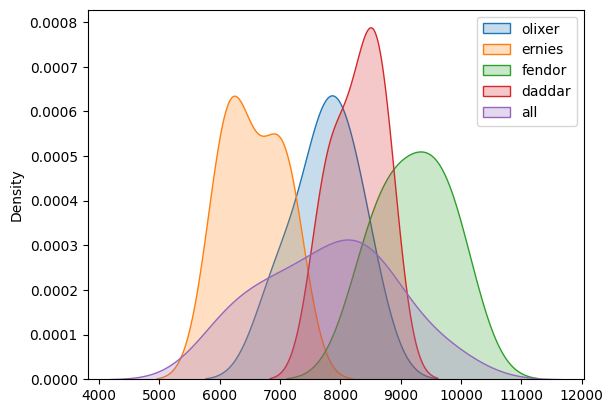

In [57]:
# Construct kernel density estimate plot
sns.kdeplot(guitar1, label='olixer', shade=True)
sns.kdeplot(guitar2, label='ernies', shade=True)
sns.kdeplot(guitar3, label='fendor', shade=True)
sns.kdeplot(guitar4, label='daddar', shade=True)
all_data = np.concatenate((guitar1, guitar2, guitar3, guitar4))
sns.kdeplot(all_data, label='all', shade=True)

plt.legend()
plt.show()

